<a href="https://colab.research.google.com/github/Erifai/SupervisedLearningProjectM2/blob/main/SupervisedLearningProjectM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  # this code, allow us to work with offline plotly version
import plotly.graph_objs as go                         # it's like "plt" of matplot
import plotly.tools as tls                             # It's useful to we get some tools of plotly
from collections import Counter                        # To do counter of some features
import plotly.figure_factory as ff




from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# import warnings

# from sklearn.exceptions import ConvergenceWarning
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter("ignore", category=ConvergenceWarning)

# pd.pandas.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [4]:
df = pd.read_csv('/content/german.csv',header=None)  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [6]:
df.columns =['Statut du compte courant existant', 'Durée en mois', 'Historique de crédit', 'Objectif','Montant du crédit',
             "Compte d'épargne",'Emploi actuel depuis','Taux de versement en pourcentage du revenu disponible',
             'Statut personnel et sexe','Autres débiteurs','Résidence actuelle depuis','Propriété','Age en années',
             'Autres plans de versement','Logement','Nombre de crédits existants dans cette banque','Travail','Nombre de personnes à charge',
             'Téléphone','Travailleur étranger','Risk']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Statut du compte courant existant                      1000 non-null   object
 1   Durée en mois                                          1000 non-null   int64 
 2   Historique de crédit                                   1000 non-null   object
 3   Objectif                                               1000 non-null   object
 4   Montant du crédit                                      1000 non-null   int64 
 5   Compte d'épargne                                       1000 non-null   object
 6   Emploi actuel depuis                                   1000 non-null   object
 7   Taux de versement en pourcentage du revenu disponible  1000 non-null   int64 
 8   Statut personnel et sexe                               1000

In [9]:
df.isnull().sum()

Statut du compte courant existant                        0
Durée en mois                                            0
Historique de crédit                                     0
Objectif                                                 0
Montant du crédit                                        0
Compte d'épargne                                         0
Emploi actuel depuis                                     0
Taux de versement en pourcentage du revenu disponible    0
Statut personnel et sexe                                 0
Autres débiteurs                                         0
Résidence actuelle depuis                                0
Propriété                                                0
Age en années                                            0
Autres plans de versement                                0
Logement                                                 0
Nombre de crédits existants dans cette banque            0
Travail                                                 

In [10]:
#variable catégorielle
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

for col in cat_cols:
    print(df[col].value_counts(), "\n\n")

A14    394
A11    274
A12    269
A13     63
Name: Statut du compte courant existant, dtype: int64 


A32    530
A34    293
A33     88
A31     49
A30     40
Name: Historique de crédit, dtype: int64 


A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: Objectif, dtype: int64 


A61    603
A65    183
A62    103
A63     63
A64     48
Name: Compte d'épargne, dtype: int64 


A73    339
A75    253
A74    174
A72    172
A71     62
Name: Emploi actuel depuis, dtype: int64 


A93    548
A92    310
A94     92
A91     50
Name: Statut personnel et sexe, dtype: int64 


A101    907
A103     52
A102     41
Name: Autres débiteurs, dtype: int64 


A123    332
A121    282
A122    232
A124    154
Name: Propriété, dtype: int64 


A143    814
A141    139
A142     47
Name: Autres plans de versement, dtype: int64 


A152    713
A151    179
A153    108
Name: Logement, dtype: int64 


A173    630
A172    200
A174    148
A171     22
Name

In [33]:
# 1 = GOOD
# 2 = BAD
df['Risk'].value_counts()

1    700
2    300
Name: Risk, dtype: int64

In [30]:
configure_plotly_browser_state()
#------------------------------------------------------------------
trace0 = go.Bar(
            x = df[df["Risk"]== 1]["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 1]["Risk"].value_counts().values,
            name='Good')

trace1 = go.Bar(
            x = df[df["Risk"]== 2]["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 2]["Risk"].value_counts().values,
            name='Bad')


data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
py.iplot(fig, filename='grouped-bar')

Number of Numerical Variable:  8


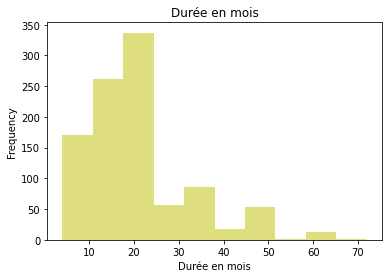

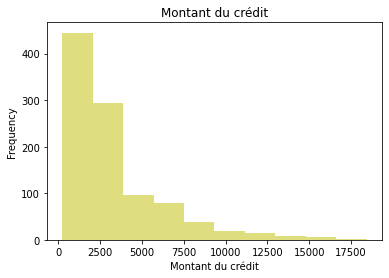

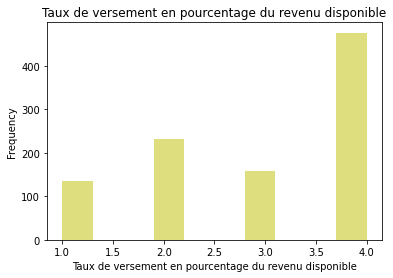

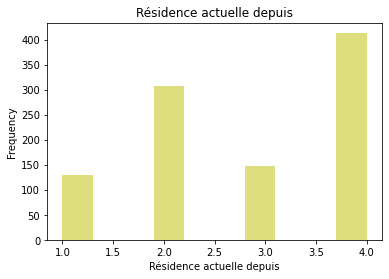

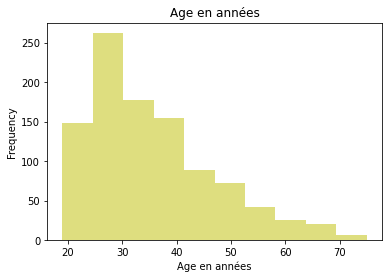

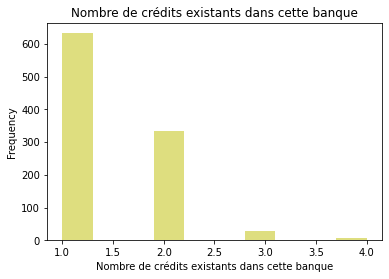

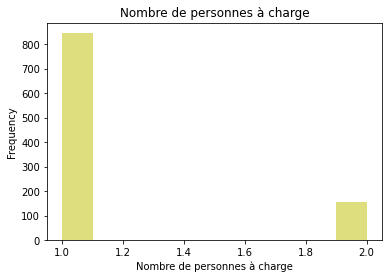

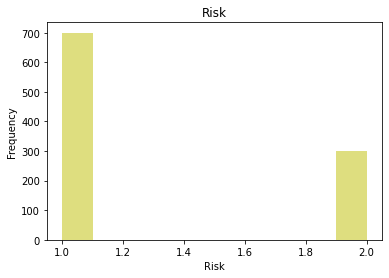

8 variables have been plotted


In [14]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variable: ', len(num_cols))


def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].plot.hist(alpha=0.5, color='y')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)

In [32]:
configure_plotly_browser_state()
#-------------------------------------------------------------------------------
df_good = df.loc[df["Risk"] == 1]['Age en années'].values.tolist()
df_bad = df.loc[df["Risk"] == 2]['Age en années'].values.tolist()
df_age = df['Age en années'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition of age'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [34]:
configure_plotly_browser_state()
#----------------------------------------------------------------------
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df['Age en années'], interval, labels=cats)

# And let's re-create "df_bad" dataframes with "df_good" we created.
df_good = df[df["Risk"] == 1]
df_bad = df[df["Risk"] == 2]

#----------------------------------------------------------------------
df['Montant du crédit']
trace0 = go.Box(
    y=df_good["Montant du crédit"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='LightSkyBlue'
    )
)

trace1 = go.Box(
    y=df_bad['Montant du crédit'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='DarkSlateGrey'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Montant du crédit',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [36]:
configure_plotly_browser_state()
#----------------------------------------------------------------------
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 1]["Logement"].value_counts().index.values,
    y = df[df["Risk"]== 1]["Logement"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df[df["Risk"]== 2]["Logement"].value_counts().index.values,
    y = df[df["Risk"]== 2]["Logement"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='Housing-Grouped')

In [38]:
configure_plotly_browser_state()
#----------------------------------------------------------------------
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 1]["Statut personnel et sexe"].value_counts().index.values,
    y = df[df["Risk"]== 1]["Statut personnel et sexe"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df[df["Risk"]== 2]["Statut personnel et sexe"].value_counts().index.values,
    y = df[df["Risk"]== 2]["Statut personnel et sexe"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df[df["Risk"]== 1]["Statut personnel et sexe"],
    y = df[df["Risk"]== 1]["Montant du crédit"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df[df["Risk"]== 2]["Statut personnel et sexe"],
    y = df[df["Risk"]== 2]["Montant du crédit"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



A91 : male : divorced/separated

A92 : female : divorced/separated/married

A93 : male : single

A94 : male : married/widowed

A95 : female : single

In [43]:
def cat_sexe(x):
  if x in L1:
    return('male') 
  else: 
    return('female')

L1 = ['A91','A93','A94']
L2 = ['A92','A95']
df['Sexe'] = df['Statut personnel et sexe'].map(cat_sexe)

In [46]:
df.Sexe.value_counts()

male      690
female    310
Name: Sexe, dtype: int64

In [47]:
configure_plotly_browser_state()
#----------------------------------------------------------------------
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 1]["Sexe"].value_counts().index.values,
    y = df[df["Risk"]== 1]["Sexe"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df[df["Risk"]== 2]["Sexe"].value_counts().index.values,
    y = df[df["Risk"]== 2]["Sexe"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df[df["Risk"]== 1]["Sexe"],
    y = df[df["Risk"]== 1]["Montant du crédit"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df[df["Risk"]== 2]["Sexe"],
    y = df[df["Risk"]== 2]["Montant du crédit"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



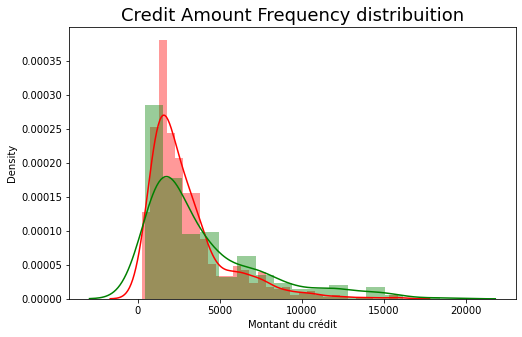

In [50]:
configure_plotly_browser_state()
#----------------------------------------------------------------
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Montant du crédit'], color='red')
g = sns.distplot(df_bad["Montant du crédit"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=18)
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Statut du compte courant existant                      1000 non-null   object  
 1   Durée en mois                                          1000 non-null   int64   
 2   Historique de crédit                                   1000 non-null   object  
 3   Objectif                                               1000 non-null   object  
 4   Montant du crédit                                      1000 non-null   int64   
 5   Compte d'épargne                                       1000 non-null   object  
 6   Emploi actuel depuis                                   1000 non-null   object  
 7   Taux de versement en pourcentage du revenu disponible  1000 non-null   int64   
 8   Statut personnel et sexe               

Values describe: 
Risk        1   2
Objectif         
A40       145  89
A41        86  17
A410        7   5
A42       123  58
A43       218  62
A44         8   4
A45        14   8
A46        28  22
A48         8   1
A49        63  34


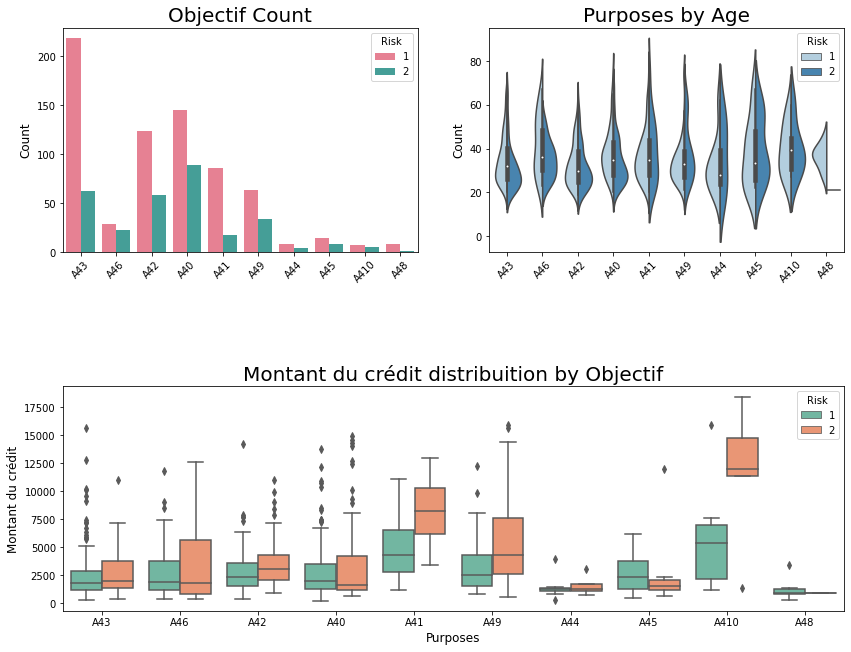

In [52]:
print("Values describe: ")
print(pd.crosstab(df['Objectif'], df.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Objectif", data=df, 
              palette="husl", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Objectif Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Objectif", y="Age en années", data=df, 
                    palette="Blues", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Objectif", y="Montant du crédit", data=df, 
               palette="Set2", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Montant du crédit", fontsize=12)
g2.set_title("Montant du crédit distribuition by Objectif", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [ ]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 1]["Checking account"].value_counts().index.values,
    y = df[df["Risk"]== 1]["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df[df["Risk"]== 2]["Checking account"].value_counts().index.values,
    y = df[df["Risk"]== 2]["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
py.iplot(fig, filename = 'Age-ba', validate = False)